In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from matplotlib import cm

In [2]:
mpl.style.use('ggplot')

##Let's define some simple non-linear functions

In [3]:
#A simple sinusoid
def f(x):
    return np.sin(2.0 * np.pi * x)

#A quadratic
def fb(x):
    return -np.power(x, 2)

#A complex mixture of sinusoids
def fc(x):
    return np.sin(2.0 * np.pi * x) + np.cos(6.0 * np.pi * x) + np.sin(16 * np.pi * x)

In [4]:
#seed the random number generator so that we can produce repeatable results
np.random.seed(9)

#m is the number of training examples
m = 100

#evenly spaced points
x_plot = np.linspace(0, 1, m)

#randomly spaced points
X = np.random.uniform(0, 1, size = m)[:, np.newaxis] #same as x.reshape(n_samples, 1)

#obtain randomly spaced y values and add some gaussian noise
y = f(X) + np.random.normal(scale=0.3, size = m)[:, np.newaxis]
yb = fb(X) + np.random.normal(scale=0.1, size = m)[:, np.newaxis]
yc = fc(X) + np.random.normal(scale=0.3, size = m)[:, np.newaxis]

#these are just to help us visualize what's going on in the x-axis
r1 = np.ones(m) * -1.5
r2 = np.ones(m) * -2.0

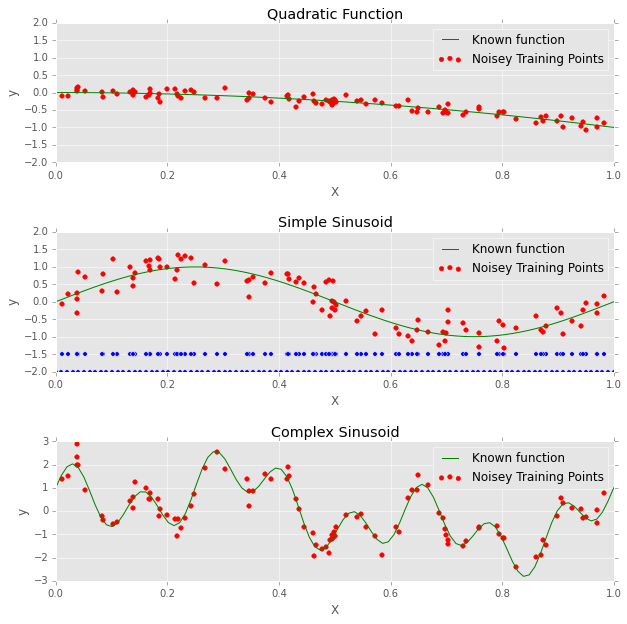

In [11]:
#Plotting
fig = plt.figure(figsize=(10,10))

#3 rows, 1 col, plot 1
ax = plt.subplot(311)

#plot the known function
ax.plot(x_plot, fb(x_plot), 'g', label='Known function')

ax.set_xlim(0,1)
ax.set_ylim(-2,2)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Quadratic Function')

#plot the noisey y points, dervied from the function
ax.scatter(X, yb, color = 'red', label="Noisey Training Points")
ax.legend()

#3 rows, 1 col, plot 2
ax = plt.subplot(312)

#plot the known function
ax.plot(x_plot, f(x_plot), 'g', label='Known function')

ax.set_xlim(0,1)
ax.set_ylim(-2,2)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Simple Sinusoid')

#for curiosity observe the randomly spaced points and the evenly spaced points on the x axis
ax.scatter(X, r1)
ax.scatter(x_plot, r2)

#plot the noisey y points, dervied from the function
ax.scatter(X, y, color = 'red', label="Noisey Training Points")
ax.legend()



#3 rows, 1 col, plot 3
ax = plt.subplot(313)

#plot the known function
ax.plot(x_plot, fc(x_plot), 'g', label='Known function')

ax.set_xlim(0,1)
ax.set_ylim(-3,3)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Complex Sinusoid')


#plot the noisey y points, dervied from the function
ax.scatter(X, yc, color = 'red', label="Noisey Training Points")
ax.legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

##Let's create both linear and non-linear regression models for the noisey training points

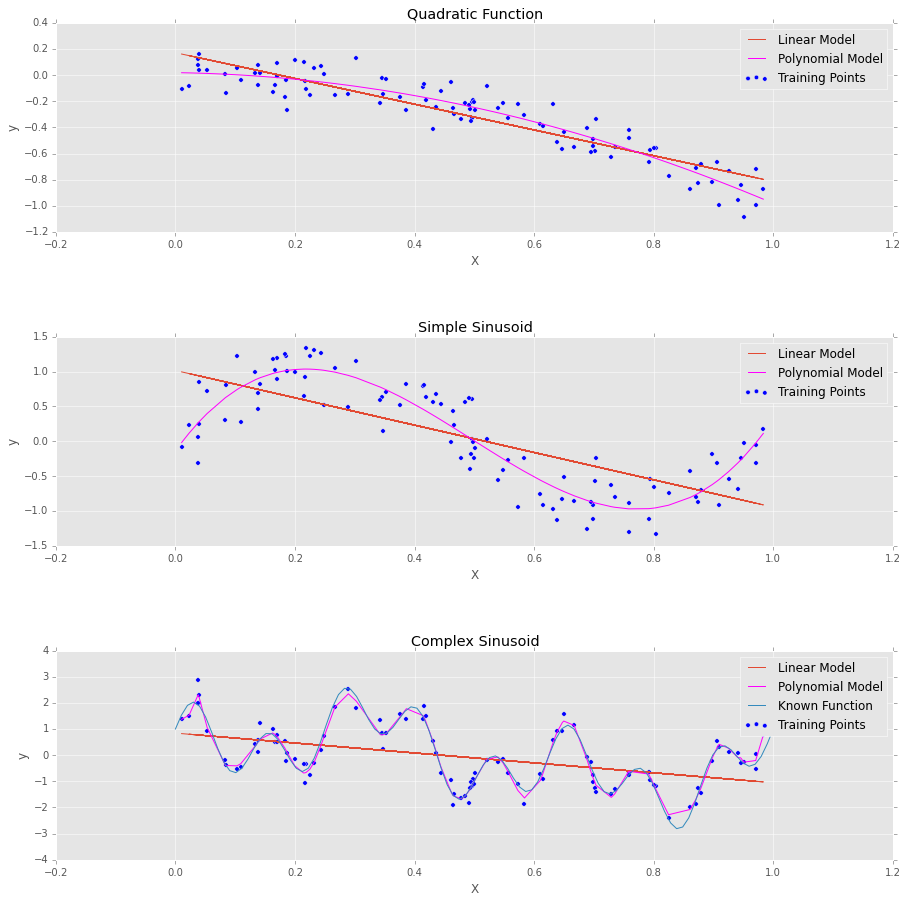

In [20]:
#Fit a model to the simple sinusoid
lin_clf = linear_model.LinearRegression(fit_intercept=True)
lin_clf.fit(X, y)

#Fit a model to the quadratic data
linb_clf = linear_model.LinearRegression(fit_intercept=True)
linb_clf.fit(X, yb)

#Fit a model to the complex sinusoid
linc_clf = linear_model.LinearRegression(fit_intercept=True)
linc_clf.fit(X, yc)

fig = plt.figure(figsize=(15, 15))



#----------QUADRATIC------------
#3 rows, 1 col, first plot
ax = plt.subplot(311)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Quadratic Function')
#make predictions using the model built on the quadratic data and plot
ax.plot(X, linb_clf.predict(X), label="Linear Model")
#plot the quadratic data
ax.scatter(X, yb, label="Training Points")

#now fit a degree 2 (quadratic) polynomial model
degree = 2
nlb_clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
nlb_clf.fit(X, yb)
#in order to plot as a line the points need to be in order
Xpb = np.sort(X[:,0])
#Xpb needs to be re-shaped again in order to work in the model
ax.plot(Xpb, nlb_clf.predict(Xpb[:, np.newaxis]), color='magenta', label="Polynomial Model")
ax.legend()


#----------SIMPLE SINUSOID------------
#3 rows, 1 col, second plot
ax1 = plt.subplot(312)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Simple Sinusoid')
ax1.plot(X, lin_clf.predict(X), label="Linear Model")
ax1.scatter(X, y, label="Training Points")

#fit a cubic (degree 3) polynomial model
degree = 3
nl_clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
nl_clf.fit(X, y)
Xp = np.sort(X[:,0])
ax1.plot(Xp, nl_clf.predict(Xp[:, np.newaxis]), color='magenta', label="Polynomial Model")
ax1.legend()


#----------COMPLEX SINUSOID------------
#3 rows, 1 col, third plot
ax2 = plt.subplot(313)
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.set_title('Complex Sinusoid')
ax2.plot(X, linc_clf.predict(X), label="Linear Model")
ax2.scatter(X, yc, label="Training Points")

#fit a massively complex polynomial of degree 50!
degree = 50
nlb_clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
nlb_clf.fit(X, yc)
Xpc = np.sort(X[:,0])
ax2.plot(Xp, nlb_clf.predict(Xp[:, np.newaxis]), color='magenta', label="Polynomial Model")
ax2.plot(x_plot, fc(x_plot), label="Known Function")
ax2.legend()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

#Now let's work in 2-dimensional feature space
##$h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$

In [22]:
#Define a 'known' function
def fd(x1, x2):
    return np.sin(2.0 * np.pi * x1) + np.cos(2.0 * np.pi * x2)

##At a pince we can still plot the results

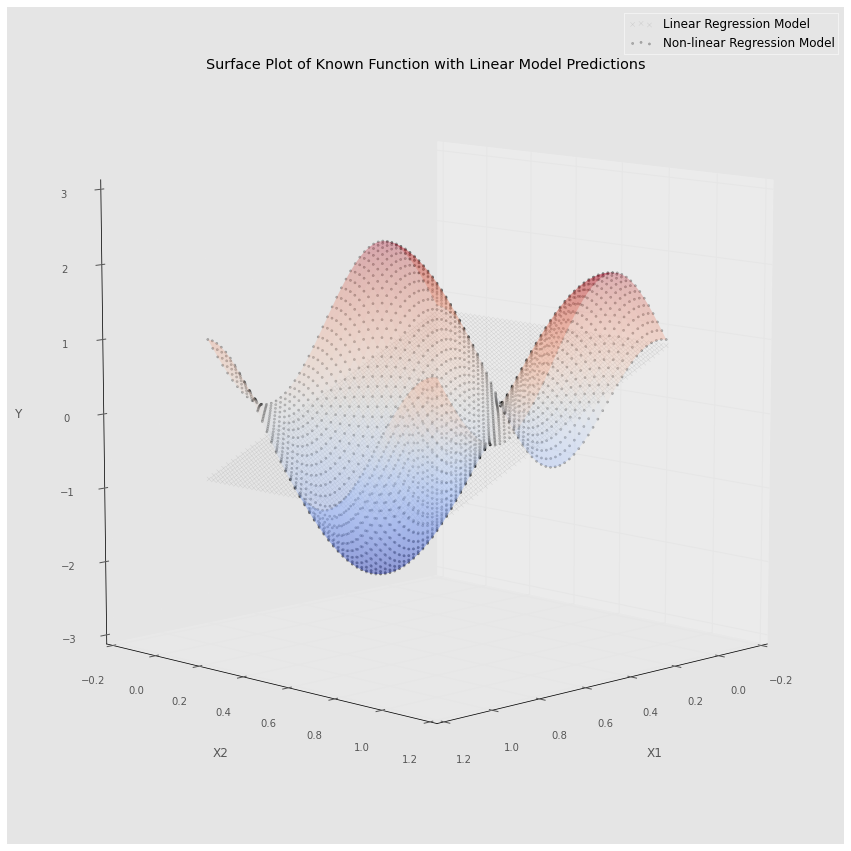

In [28]:
#create the canvas
fig = plt.figure(figsize=(15,15))

#this will be a 3 dimensional plot
ax = fig.add_subplot(1, 1, 1, projection='3d')


#-------------FIRSTLY CREATE A 3D SURFACE PLOT OF THE KNOWN FUNCTION-------------
m=50
X1a = np.linspace(0, 1, m)
X2a = np.linspace(0, 1, m)
#ynl = fd(X1a, X2a)

X1, X2 = np.meshgrid(X1a, X2a)

Z=[]
for i in range(m):
    for j in range(m):
        Z.append(fd(X1[i][j], X2[i][j]))

Z = np.array(Z)
Z = Z.reshape(m, m)

ax.elev=10.0
ax.azim=45.0

ax.set_title("Surface Plot of Known Function with Linear Model Predictions")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, \
                       cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.3)

#-------------NOW BUILD LINEAR MODELS FOR LINEAR AND NON-LINEAR REGRESSION PREDICTIONS------------
#-------------To avoid difficult to understand reshaping, use the pandas dataframe data structure
T1 = []
T2 = []

#Create a meshgrid as two columns for a dataframe
for i in range(m):
    for j in range(m):
        T1.append(X1a[i])
        T2.append(X2a[j])

#Create the dictionary
data = {'T1':T1, 'T2':T2}

#and convert to a dataframe
df = pd.DataFrame(data)

#create the y column
df['y'] = fd(df.T1, df.T2)

#create and fit the dataframe data to a linear model - creating a 2-dimensional plane
nlin_clf = linear_model.LinearRegression(fit_intercept=True)
nlin_clf.fit(df[['T1', 'T2']], df['y'])
#plot the predictions from the model
ax.scatter(df['T1'], df['T2'], nlin_clf.predict(df[['T1', 'T2']]), \
           alpha = 0.1, color = 'black', marker = 'x', label="Linear Regression Model")

#now create and fit a non-linear regression model using a polynomial of degree 50!
nlinb_clf = linear_model.LinearRegression(fit_intercept=True)
degree = 50
nlinb_clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
nlinb_clf.fit(df[['T1', 'T2']], df['y'])
#plot the predictions from the model
ax.scatter(df['T1'], df['T2'], nlinb_clf.predict(df[['T1', 'T2']]), \
           alpha = 0.25, color = 'black', marker = '.', label="Non-linear Regression Model")
ax.legend()